In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

code

In [3]:
df= pd.read_csv('data.csv', encoding='latin1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df = df[~df['InvoiceNo']]
display(df.head())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df = df[df['UnitPrice'] > 0]
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df= df[df['StockCode']]

In [8]:
df = df[df['StockCode'].str.match(r'^\d+$', na=False)]
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom


In [11]:
df.to_csv('cleaned_data.csv', index=False)

You can download the cleaned data [here](cleaned_data.csv).

# Task
Perform exploratory data analysis on the dataset "Online Retail.xlsx" to answer key business questions, including identifying top-selling products, countries with highest revenue, monthly revenue trends, average order value per country, unique customers, top customers by revenue, distribution of order sizes, correlation between quantity and price, most active purchase hour, and invoices per month. Clean the data by removing rows where 'InvoiceNo' starts with 'C', 'UnitPrice' is 0 or negative, and 'StockCode' contains letters. Finally, download the cleaned dataset without the index.

## Calculate total price

### Subtask:
Create a new column 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'.


**Reasoning**:
Calculate the 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice' and add it as a new column to the dataframe.



In [12]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10


## Top 10 best-selling products

### Subtask:
Group the data by 'Description' and sum the 'Quantity' to find the best-selling products.


**Reasoning**:
Group the data by 'Description', sum the 'Quantity', sort in descending order, and select the top 10 to find the best-selling products.



In [13]:
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
display(top_10_products)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788
MINI PAINT SET VINTAGE,26633
PACK OF 12 LONDON TISSUES,26135


## Countries with highest revenue

### Subtask:
Group the data by 'Country' and sum the 'TotalPrice' to find the countries with the highest revenue.


**Reasoning**:
Group the DataFrame by 'Country', sum the 'TotalPrice', sort in descending order, and display the result.



In [14]:
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
display(revenue_by_country)

,TotalPrice
Country,
United Kingdom,7949840.23
Netherlands,269330.18
EIRE,255964.95
Germany,190201.94
France,174200.23
Australia,134070.62
Switzerland,48731.73
Spain,43046.19
Japan,35975.17


## Monthly revenue trend

### Subtask:
Convert 'InvoiceDate' to datetime, extract the month and year, group by month and year, and sum 'TotalPrice' to analyze the monthly revenue trend.


**Reasoning**:
Convert 'InvoiceDate' to datetime, extract month and year, group by month and year, sum 'TotalPrice', and display the result.



In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year
monthly_revenue = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum()
display(monthly_revenue)

InvoiceYear  InvoiceMonth
2010         12               683952.25
2011         1                583721.62
             2                453673.26
             3                621155.26
             4                458226.25
             5                670303.94
             6                679150.54
             7                617780.47
             8                660876.00
             9                959089.63
             10              1032452.51
             11              1358236.05
             12               589374.04
Name: TotalPrice, dtype: float64

## Average order value per country

### Subtask:
Group the data by 'Country' and 'InvoiceNo', calculate the sum of 'TotalPrice' for each invoice, and then find the average of these sums per country.


**Reasoning**:
To calculate the average order value per country, I need to first calculate the total revenue for each invoice within each country, and then calculate the average of these invoice totals for each country.



In [17]:
average_order_value_per_country = df.groupby(['Country', 'InvoiceNo'])['TotalPrice'].sum().groupby('Country').mean().sort_values(ascending=False)
display(average_order_value_per_country)

,TotalPrice
Country,
Netherlands,2927.501957
Australia,2394.118214
Singapore,2179.392500
Japan,1893.430000
Lebanon,1663.580000
Hong Kong,1219.742857
Brazil,1069.650000
Sweden,1064.486364
Cyprus,985.581667


## Unique customers

### Subtask:
Count the number of unique values in the 'CustomerID' column.


**Reasoning**:
Count the number of unique values in the 'CustomerID' column.



In [18]:
unique_customers = df['CustomerID'].nunique()
display(unique_customers)

4314

## Top 5 customers by revenue

### Subtask:
Group the data by 'CustomerID', sum the 'TotalPrice', and find the top 5 customers.


**Reasoning**:
Group the DataFrame by 'CustomerID', calculate the sum of 'TotalPrice' for each customer, sort the results in descending order, select the top 5, and display the result to identify the top 5 customers by revenue.



In [19]:
top_5_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5)
display(top_5_customers)

,TotalPrice
CustomerID,
14646.0,265106.92
18102.0,253922.76
17450.0,180847.03
16446.0,168472.50
14911.0,125544.35


## Distribution of order sizes

### Subtask:
Group the data by 'InvoiceNo' and count the number of rows (products) per invoice.


**Reasoning**:
Group the DataFrame by 'InvoiceNo' and count the number of rows per invoice to determine the distribution of order sizes.



In [20]:
order_sizes = df.groupby('InvoiceNo').size()
display(order_sizes.head())

,0
InvoiceNo,
536365,3
536366,2
536367,12
536368,4
536369,1


## Correlation between quantity and price

### Subtask:
Calculate the correlation coefficient between 'Quantity' and 'UnitPrice'.


**Reasoning**:
Calculate the correlation coefficient between 'Quantity' and 'UnitPrice' and display the result.



In [21]:
correlation_quantity_unitprice = df['Quantity'].corr(df['UnitPrice'])
display(correlation_quantity_unitprice)

np.float64(-0.02140574616619628)

## Most active purchase hour

### Subtask:
Extract the hour from 'InvoiceDate' and count the occurrences of each hour.


**Reasoning**:
Extract the hour from the 'InvoiceDate' column and count the occurrences of each hour to find the most active purchase hours.



In [22]:
df['PurchaseHour'] = df['InvoiceDate'].dt.hour
purchase_hour_counts = df['PurchaseHour'].value_counts().sort_index()
display(purchase_hour_counts)

,count
PurchaseHour,
6,1
7,348
8,8059
9,30259
10,43457
11,51063
12,70065
13,64191
14,59413


## Invoices per month

### Subtask:
Extract the month and year from 'InvoiceDate' and count the number of unique 'InvoiceNo' per month.


**Reasoning**:
Group the DataFrame by 'InvoiceYear' and 'InvoiceMonth' and count the number of unique 'InvoiceNo' for each group to get the number of invoices per month.



In [23]:
invoices_per_month = df.groupby(['InvoiceYear', 'InvoiceMonth'])['InvoiceNo'].nunique()
display(invoices_per_month)

InvoiceYear  InvoiceMonth
2010         12              1526
2011         1               1061
             2               1077
             3               1426
             4               1217
             5               1642
             6               1513
             7               1433
             8               1326
             9               1803
             10              1985
             11              2732
             12               808
Name: InvoiceNo, dtype: int64

## Visualize results

### Subtask:
Create appropriate visualizations (e.g., bar plots, line plots, histograms) to display the results of the analysis.


**Reasoning**:
Create the visualizations as requested in the subtask instructions using the previously generated data Series.



/tmp/ipython-input-24-1981522843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')


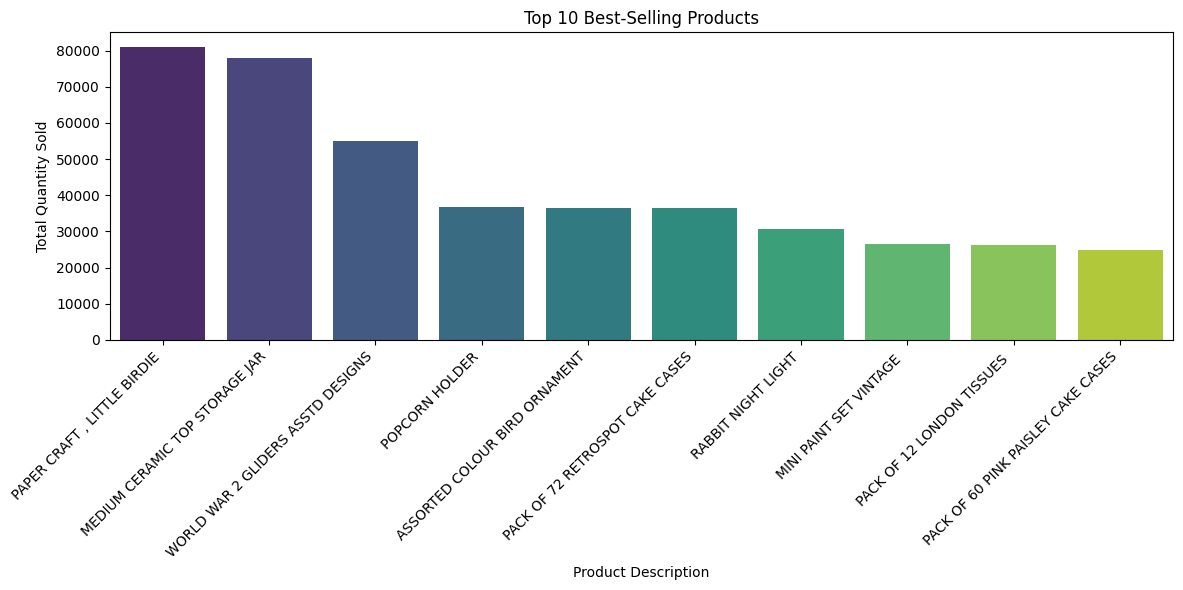

/tmp/ipython-input-24-1981522843.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries_revenue.index, y=top_10_countries_revenue.values, palette='viridis')


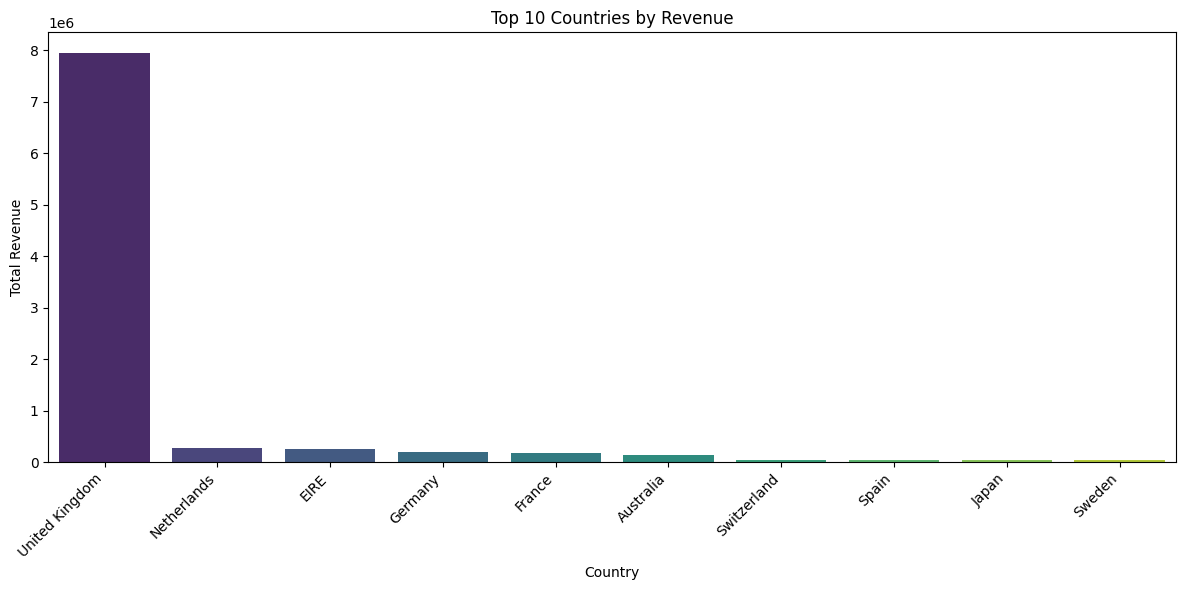

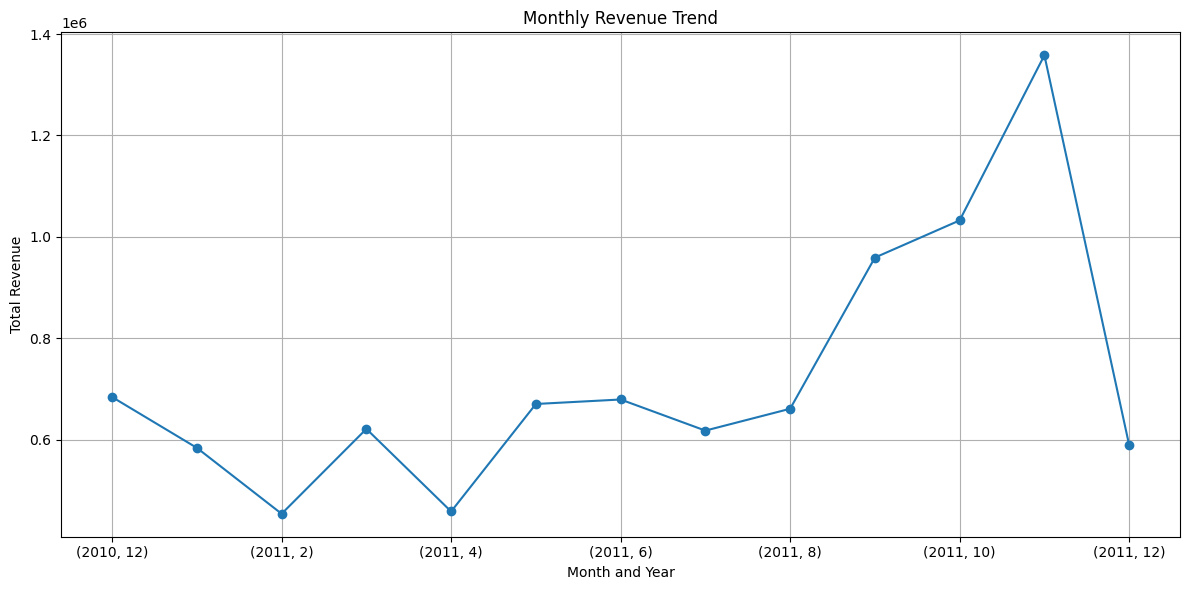

/tmp/ipython-input-24-1981522843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries_aov.index, y=top_10_countries_aov.values, palette='viridis')


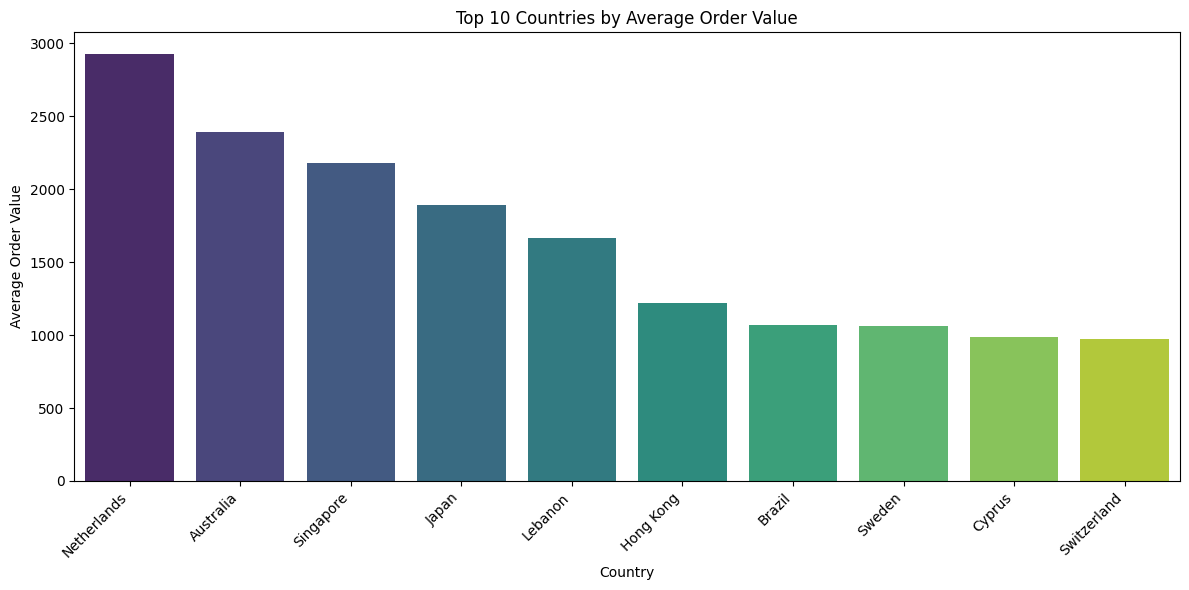

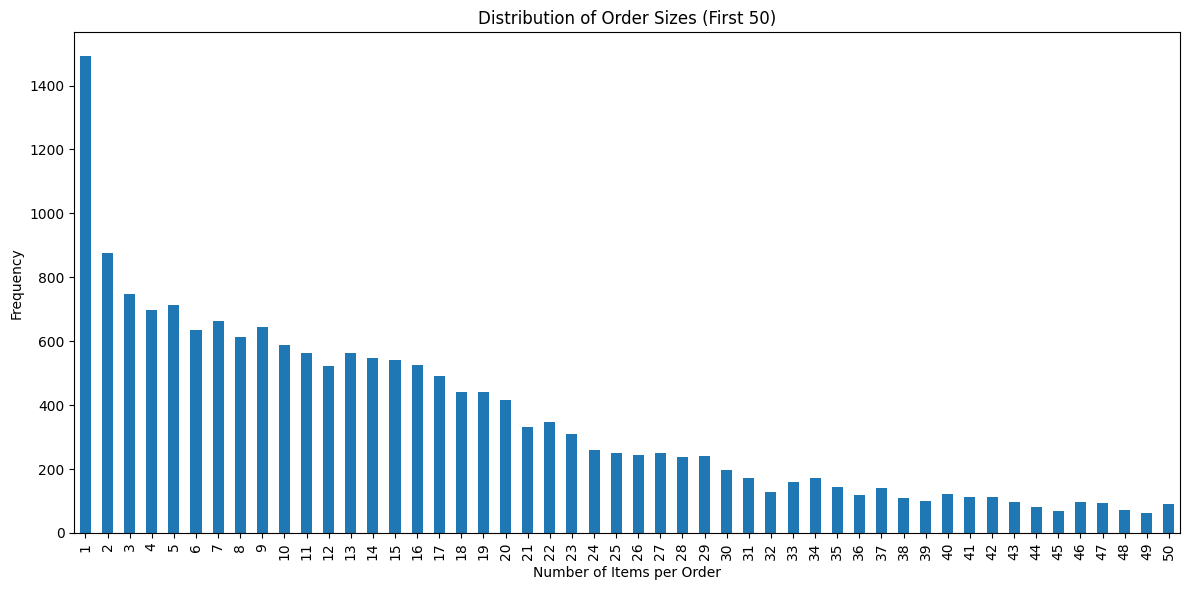

/tmp/ipython-input-24-1981522843.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_hour_counts.index, y=purchase_hour_counts.values, palette='viridis')


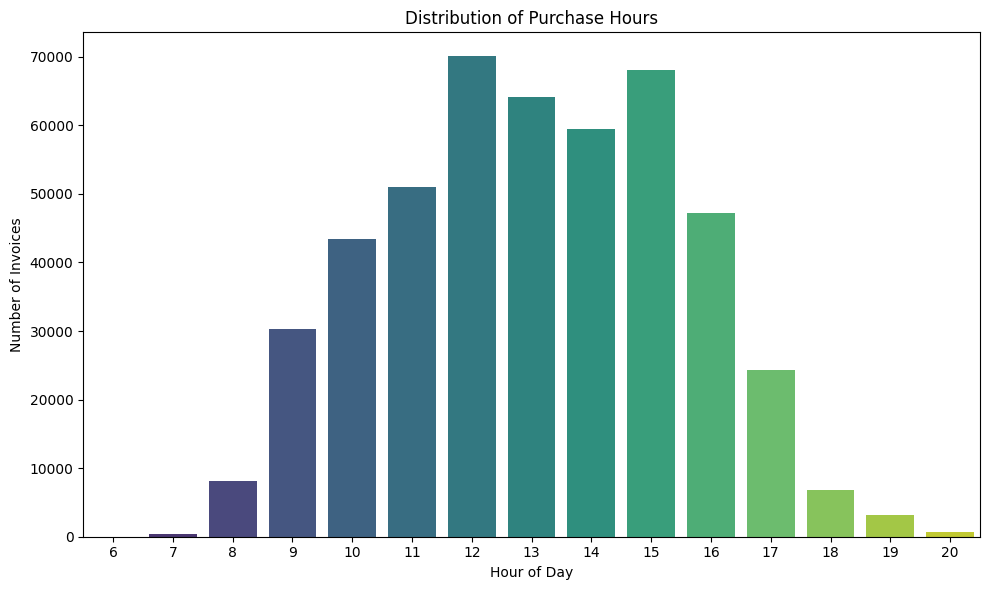

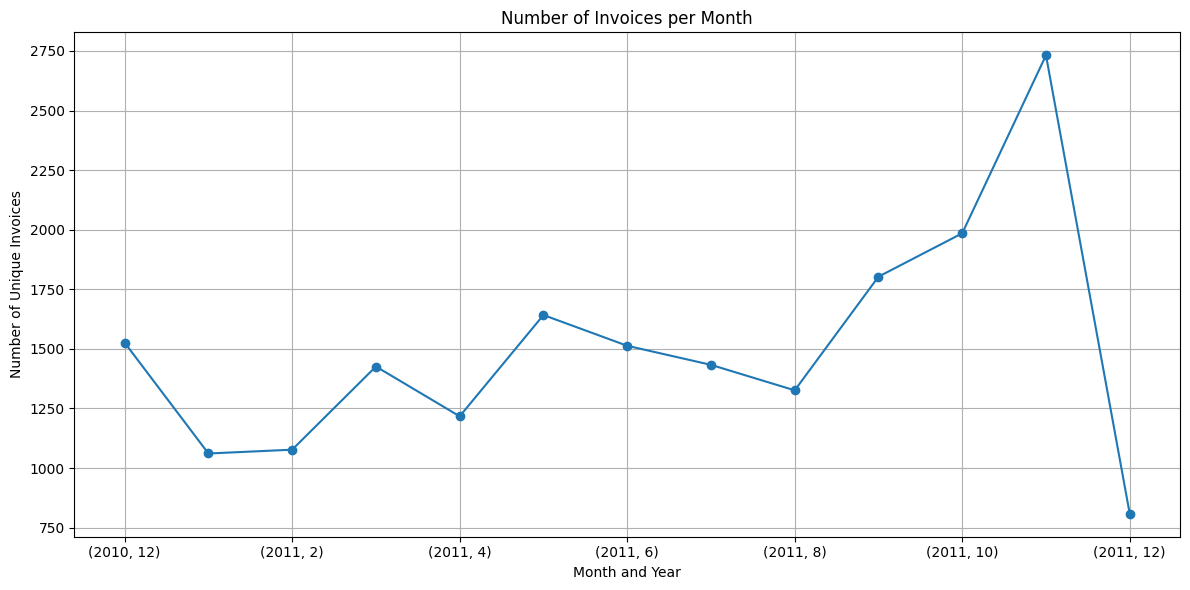

In [24]:
# 1. Top 10 best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Revenue by country (Top 10)
plt.figure(figsize=(12, 6))
# Display top 10 countries for better readability
top_10_countries_revenue = revenue_by_country.head(10)
sns.barplot(x=top_10_countries_revenue.index, y=top_10_countries_revenue.values, palette='viridis')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Monthly revenue trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month and Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Average order value per country (Top 10)
plt.figure(figsize=(12, 6))
# Display top 10 countries for better readability
top_10_countries_aov = average_order_value_per_country.head(10)
sns.barplot(x=top_10_countries_aov.index, y=top_10_countries_aov.values, palette='viridis')
plt.title('Top 10 Countries by Average Order Value')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Distribution of order sizes (showing first 50 for clarity)
plt.figure(figsize=(12, 6))
# Limit to first 50 unique order sizes for better visualization
order_sizes.value_counts().sort_index().head(50).plot(kind='bar')
plt.title('Distribution of Order Sizes (First 50)')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Most active purchase hours
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_hour_counts.index, y=purchase_hour_counts.values, palette='viridis')
plt.title('Distribution of Purchase Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

# 7. Invoices per month
plt.figure(figsize=(12, 6))
invoices_per_month.plot(kind='line', marker='o')
plt.title('Number of Invoices per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Unique Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key findings from the EDA.


## Summary:

### Data Analysis Key Findings

*   The top-selling product by quantity is "PAPER CRAFT, LITTLE BIRDIE" with 80,995 units sold.
*   The United Kingdom generates the highest revenue.
*   Monthly revenue shows fluctuations, with November 2011 having the highest revenue.
*   The Netherlands has the highest average order value per country.
*   There are 4,314 unique customers in the dataset.
*   Customer ID 14646.0 is the top customer by revenue, spending £265,106.92.
*   The distribution of order sizes varies, with many orders containing a small number of items.
*   There is a very weak negative correlation (-0.0214) between Quantity and UnitPrice.
*   The most active purchase hours are between 10:00 and 16:00.
*   November 2011 had the highest number of unique invoices (2732), while December 2011 had the lowest (808).

### Insights or Next Steps

*   The significant difference in revenue and average order value across countries suggests tailoring marketing and sales strategies to specific regions.
*   The identification of peak purchase hours can inform staffing and promotional activities to maximize sales during busy periods.
